# Support Vector Machine

In [2]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pickle

### Load the pickle files

In [3]:
# Load the features training set
with open('subsets_ft.pkl', 'rb') as file:
    features_training= pickle.load(file)
features_training

,DftYr,GP,G,A,A1,A2,PTS,Shifts,TOI,TOI/GP,...,TKA,PENT,PEND,OPS,DPS,PS,OTOI,GS,GS/G,Age
416,0.64,1.000000,0.575,0.428571,0.500000,0.258065,0.581395,0.665158,0.631581,0.562553,...,0.472622,0.417808,0.547445,0.521739,0.216216,0.418182,0.912349,0.542995,0.659459,0.304348
618,0.72,0.950617,0.025,0.111111,0.052632,0.161290,0.093023,0.721719,0.631836,0.600000,...,0.386167,0.568493,0.503650,0.078261,0.364865,0.175758,0.831395,0.059903,0.329730,0.260870
63,0.48,0.987654,0.025,0.222222,0.184211,0.225806,0.174419,0.890271,0.815014,0.785106,...,0.587896,0.726027,0.540146,0.104348,0.648649,0.321212,0.799686,0.205797,0.432432,0.521739
611,0.76,0.901235,0.150,0.269841,0.210526,0.290323,0.267442,0.773379,0.725383,0.760851,...,0.541787,0.643836,0.503650,0.260870,0.810811,0.503030,0.757226,0.399034,0.589189,0.217391
391,0.80,0.432099,0.150,0.079365,0.052632,0.096774,0.127907,0.285445,0.271271,0.548936,...,0.170029,0.335616,0.197080,0.165217,0.094595,0.115152,0.402721,0.110145,0.427027,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.80,0.777778,0.250,0.301587,0.289474,0.258065,0.337209,0.508296,0.433026,0.474468,...,0.317003,0.417808,0.467153,0.286957,0.216216,0.254545,0.745332,0.473430,0.697297,0.130435
223,0.84,0.876543,0.450,0.682540,0.789474,0.419355,0.709302,0.599548,0.597429,0.618298,...,0.452450,0.561644,0.788321,0.565217,0.202703,0.442424,0.787276,0.640580,0.783784,0.086957
271,0.44,0.962963,0.025,0.238095,0.184211,0.258065,0.186047,0.765460,0.686572,0.656170,...,0.414986,0.616438,0.649635,0.147826,0.324324,0.206061,0.869354,0.283092,0.491892,0.565217
474,0.92,1.000000,0.675,0.492063,0.394737,0.516129,0.674419,0.690045,0.646906,0.580000,...,0.515850,0.534247,0.678832,0.600000,0.256757,0.490909,0.955327,0.591304,0.691892,0.043478


In [4]:
# Load the features validation set
with open('subsets_fv.pkl', 'rb') as file:
    features_validation= pickle.load(file)
features_validation

,DftYr,GP,G,A,A1,A2,PTS,Shifts,TOI,TOI/GP,...,TKA,PENT,PEND,OPS,DPS,PS,OTOI,GS,GS/G,Age
9,0.84,0.111111,0.075,0.000000,0.000000,0.000000,0.034884,0.059578,0.047122,0.294468,...,0.011527,0.020548,0.021898,0.182609,0.054054,0.109091,0.114977,0.065700,0.454054,0.130435
511,0.72,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.001131,0.000983,0.092766,...,0.000000,0.000000,0.000000,0.147826,0.027027,0.072727,0.001517,0.042512,0.372973,0.043478
308,0.92,0.987654,0.500,0.507937,0.578947,0.322581,0.604651,0.773379,0.655592,0.599149,...,0.452450,0.472603,0.452555,0.495652,0.256757,0.418182,0.964684,0.486957,0.627027,0.000000
219,0.72,0.320988,0.050,0.015873,0.000000,0.032258,0.034884,0.151584,0.109517,0.222128,...,0.031700,0.260274,0.167883,0.139130,0.054054,0.072727,0.331531,0.051208,0.340541,0.434783
578,0.84,1.000000,0.400,0.460317,0.289474,0.580645,0.523256,0.700603,0.636480,0.568085,...,0.688761,0.397260,0.525547,0.382609,0.216216,0.327273,0.940119,0.477295,0.621622,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0.44,0.604938,0.050,0.015873,0.000000,0.032258,0.034884,0.190045,0.150053,0.119149,...,0.121037,0.116438,0.138686,0.113043,0.040541,0.054545,0.588957,0.079227,0.362162,0.521739
281,0.84,0.259259,0.025,0.031746,0.000000,0.064516,0.034884,0.150452,0.127009,0.385106,...,0.077810,0.095890,0.065693,0.156522,0.135135,0.127273,0.236576,0.066667,0.383784,0.086957
53,0.72,0.679012,0.050,0.142857,0.105263,0.161290,0.127907,0.535068,0.504497,0.686383,...,0.351585,0.404110,0.328467,0.147826,0.216216,0.157576,0.582710,0.142029,0.421622,0.217391
147,0.72,0.592593,0.150,0.126984,0.078947,0.161290,0.162791,0.322398,0.272974,0.362553,...,0.233429,0.294521,0.255474,0.191304,0.148649,0.157576,0.559750,0.172947,0.470270,0.391304


In [5]:
#  Load the label training set
with open('subsets_lt.pkl', 'rb') as file:
    label_training= pickle.load(file)
label_training

456    8000000.0
674    1000000.0
69     5600000.0
667    3500000.0
431     950000.0
         ...    
243    4500000.0
248    6750000.0
298    4500000.0
519    6500000.0
390     925000.0
Name: Salary, Length: 622, dtype: float64

In [6]:
# Load the label validation set
with open('subsets_lv.pkl', 'rb') as file:
    label_validation= pickle.load(file)
label_validation

11      667500.0
558     630000.0
337     832500.0
244    2000000.0
634    4000000.0
         ...    
784     750000.0
309     632500.0
59     5250000.0
161    3500000.0
435    4500000.0
Name: Salary, Length: 78, dtype: float64

### Experiment with at least three different values of the C parameter. Explain what this parameter controls. 

In the code below, a list has been created to test different C values (1, 10, 100, 1000, 2000) in the grid search.

C parameter controls the decision boundary between trying to classify the points correctly, meaning penalizing more for misclassifications and trying to space out the lines, allowing more data points to be misclassified. 

If C is large, then the error formula is dominated by the classification error, so our classifier focuses more on classifying the data points correctly. 

If C is small, then the formula is dominated by the distance error, so our classifier focuses more on keeping the lines far apart.

In our case, C=2000 works the best.

### Try the linear, rbf (with different choices of gamma) and polynomial kernels. Comment on which of these works best for your data and why.

We have tried three kernals in our grid search. **Polynomial kernel** works the best.

**Linear**

The linear kernal is for dataset that demonstrates a linear realtionship between the feature and label. Since our data is nonlinear, it may not capture the complex nonlinear patterns in our dataset.

**RBF**

We’ve tried the radial basis function kernel with a different choices of gamma (1,10,100,500) in our grid search. The optimal model with RBF kernel is using gamma=0.1. As gamma controls the wideness of the radial basis function and a lower gamma indicates a wider bumps, for gamma=0.1, the model is prone to underfit, because this means each data point is less influencial to the model and the decision boundary is simpler, it may miss some patterns and make more mistakes.

 **Polynomial**

 We tried polynomial kernel with a default degree of 3. Based on the grid search, this kernel works best. Since our dataset is not linearly separable, polynomial kernal helps the dataset embedded in a higher dimensional space, in which the points may be easier to classify with a linear classifier. Moreover, it obtained relatively low values in RMSE, MSE and MAE, with a relatively better R^2 results in both training and validation set.      


In [7]:
# grid search for the best parameters
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'gamma':[0.1,1,10,100,500], 
              'C': [1, 10, 100, 1000, 2000]}


# set the grid search
grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# fit the grid search
grid = grid_search.fit(features_training, label_training)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [8]:
# check the grid search results, sorted by test score from the best
grid_result = pd.DataFrame(grid.cv_results_, 
                           columns=['rank_test_score','mean_test_score', 'std_test_score', 'params']).sort_values(by=['rank_test_score'], 
                           ascending=True)

# set the display to show all the columns
pd.set_option('display.max_colwidth', None)

# check the top 10 results
grid_result.head(30)

,rank_test_score,mean_test_score,std_test_score,params
64,1,-1.407096e+06,60347.588629,"{'C': 2000, 'gamma': 1, 'kernel': 'poly'}"
7,2,-1.427492e+06,49203.445421,"{'C': 1, 'gamma': 10, 'kernel': 'poly'}"
49,3,-1.427492e+06,49203.391071,"{'C': 1000, 'gamma': 1, 'kernel': 'poly'}"
22,4,-1.438542e+06,69231.677684,"{'C': 10, 'gamma': 10, 'kernel': 'poly'}"
34,5,-1.577989e+06,36677.906539,"{'C': 100, 'gamma': 1, 'kernel': 'poly'}"
37,6,-1.656418e+06,49297.560538,"{'C': 100, 'gamma': 10, 'kernel': 'poly'}"
19,7,-1.710730e+06,99603.468544,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}"
66,8,-1.839473e+06,129664.499749,"{'C': 2000, 'gamma': 10, 'kernel': 'linear'}"
72,8,-1.839473e+06,129664.499749,"{'C': 2000, 'gamma': 500, 'kernel': 'linear'}"
69,8,-1.839473e+06,129664.499749,"{'C': 2000, 'gamma': 100, 'kernel': 'linear'}"


i. Find predictions using the validation set.


ii.Use the score() function to display the training/validation coefficient of determination.

iii.Decide which metrics to use in analysis (e.g. absolute error, RMSE, MSE, recall, precision, Fβ score, etc.); calculate them using the validation set and display them. Explain how these metrics will help you decide which model is best.

Since our model is a regression model, we will exclude classification metrics and focus on mainly three metrics in our analysis, namely, mean absolute error (MAE), mean square error (MSE) and root mean square error(RMSE). 

**MAE** measures the average absolute difference between the predicted and actual salaries, so we are expecting a model with a lower MAE. Since it does not square the error, it is less sensitive to outliers compared to MSE and RMSE. 

**MSE** measures the average squared difference between the predicted and actual salaries. We are expecting a model with a lower MSE because it means the predicated salaries are closer to the actual earning. MSE gives higher weight to larger errors, which makes it sensitive to outliers.

Same with **RMSE** which is the square root of MSE, it measures the average error in the same units as the label which makes it easy to interpret. The lower the RMSE, the closer the prediction to the actually earning.

Additionally, we could also consider **R^2** when comparing models, since R^2 provides a measure of how well the model fits our data and help assess the proportion of variability in the label that can be explained by the model. It ranges from 0 to 1, a higher R^2 indicates a better fit of the model to the data. But we need to be aware that a model with a high R^2 value may not necessarily be a good predictor, as it may overfit the data resulting poor prediction on new data.

In a nutshell, since our goal here is to minimize the prediction errors with a disparity of earnings, the metrics like MSE, RMSE may be more appropriate in our case.



In [9]:
# keep the parameters for the top 20 results, so we can test three kernels
params = grid_result['params'].head(10)

# create a dictionary to store the best parameters
best_para ={}

# create a variable to store the minimum rmse
min_rmse=10000000

for i in params:
    svr = SVR(C=i['C'], gamma=i['gamma'], kernel=i['kernel'])
    model = svr.fit(features_training, label_training)

    # make predictions using validation set
    pred = model.predict(features_validation)

    # return the training/validation coefficient of determination (R^2)
    score_training = model.score(features_training, label_training)
    score_validation= model.score(features_validation, label_validation)

    # return the mean absolute error
    mae = mean_absolute_error(label_validation, pred).astype(int)

    # return the mean squared error
    mse = mean_squared_error(label_validation, pred)
    
    # return the root mean squared error
    rmse = mean_squared_error(label_validation, pred, squared=False).astype(int) 
    
    # create a dataframe to compare different models
    compare = pd.DataFrame({'Actual': label_validation, 
                            'Predicted': pred, 
                            'R^2_validation': score_validation,
                            'R^2_training': score_training, 
                            'MAE':mae, 
                            'MSE':mse,
                            'RMSE':rmse})
     # check the parameter with the lowest rmse
    if rmse<min_rmse:
        best_para = i
        min_rmse=rmse

    print("Parameters:", i)
    print(compare)
    print('--------------------------------------------------------------------------')

Parameters: {'C': 2000, 'gamma': 1, 'kernel': 'poly'}
        Actual     Predicted  R^2_validation  R^2_training     MAE  \
11    667500.0  7.011217e+05        0.674138      0.657556  848729   
558   630000.0  6.756916e+05        0.674138      0.657556  848729   
337   832500.0  1.777296e+06        0.674138      0.657556  848729   
244  2000000.0  8.024228e+05        0.674138      0.657556  848729   
634  4000000.0  3.127388e+06        0.674138      0.657556  848729   
..         ...           ...             ...           ...     ...   
784   750000.0  8.780772e+05        0.674138      0.657556  848729   
309   632500.0  7.385167e+05        0.674138      0.657556  848729   
59   5250000.0  2.369878e+06        0.674138      0.657556  848729   
161  3500000.0  1.233833e+06        0.674138      0.657556  848729   
435  4500000.0  3.784327e+06        0.674138      0.657556  848729   

              MSE     RMSE  
11   1.615649e+12  1271081  
558  1.615649e+12  1271081  
337  1.615649e+12 

### Compare models and justify a final choice of hyperparameters based on the above quantitative analysis and the use case. Comment on overfitting, underfitting and any qualitative reasoning.

In [10]:
print("Best parameters from the above ten models:", best_para, "with RMSE:", min_rmse)

Best parameters from the above ten models: {'C': 10, 'gamma': 10, 'kernel': 'poly'} with RMSE: 1119361


**Best Model from the above ten models:**

Paramters: {'C': 10, 'gamma': 10, 'kernel': 'poly'} 

MSE = 1252971000000

RMSE = 1119361

MAE = 753749

R^2 (Validation) = 0.747287      

R^2 (Training) = 0.739822  

Based on our chosen evaluation metrics, we prioritized the model with the lowest RMSE and MSE values for further analysis. 

The RMSE was calculated be \\$1119361, representing the average squared root difference between the predicted and actual salaries, and the MAE to be \\$753749, representing the average absolute difference. We observed that the model with the lowest RMSE outperforms the other models. The MSE, RMSE, and MAE values are relatively lower than those of the other models, indicating that the model's predictions are closer to the actual salaries and it can provide more accurate salary estimates.

Furthermore, we observed the R-squared value for both the training set and validation set is better than the rest. The R^2 value was calculated to be 0.74 for the training set, indicating that 74% of the variance in the salaries can be explained by the model. Similarly, the R^2 value was also found to be 0.74 for the validation set, indicating that the model captures 74% of the variability in salaries.


In [11]:
grid.best_params_


{'C': 2000, 'gamma': 1, 'kernel': 'poly'}

We observed that the grid search obtained a different set of best parameters. This could be due to the fact that we did not perform cross-validation when selecting the best parameters from the ten models evaluated in the grid search. As more data is fed into the model, the optimal parameters may change. While during the grid search, we utilized five-fold cross-validation, meaning splitting the training data into five subsets for model evaluation. Therefore, we  trust the obtained result and will use the parameter set from grid search. But the logic behind selecting the best parameters was based on a combination of quantitative and qualitative analysis, as explained above.

Next, we plot the predicted and acutal salaries to exam where to improve next.

In [12]:
# create a model with the best parameters
best_svr=SVR(C=2000, gamma=1, kernel='poly')
best_svr.fit(features_training, label_training)

SVR(C=2000, gamma=1, kernel='poly')

In [13]:
# save the prediction
pred=best_svr.predict(features_validation)

In [14]:
# create a dataframe to compare the actual and predicted values
acts=pd.DataFrame({'Actual':label_validation, 'Predicted':pred}).astype(int)
acts

,Actual,Predicted
11,667500,701121
558,630000,675691
337,832500,1777295
244,2000000,802422
634,4000000,3127388
...,...,...
784,750000,878077
309,632500,738516
59,5250000,2369878
161,3500000,1233832


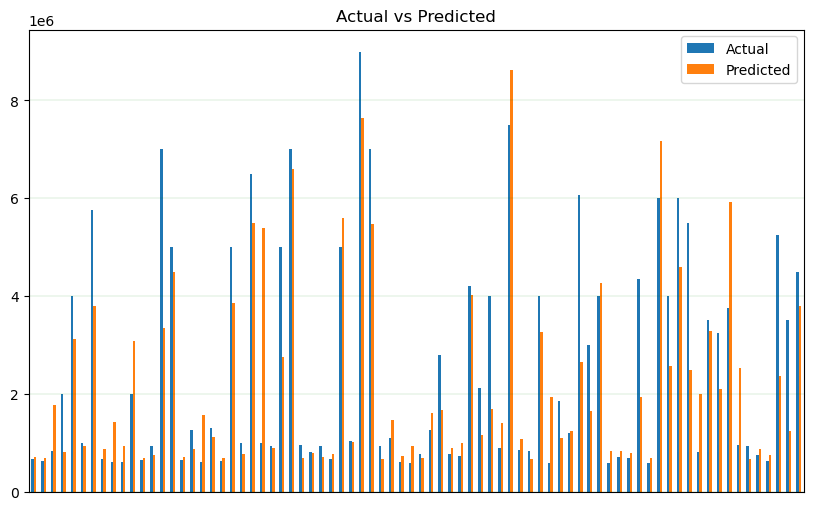

In [15]:
# plot the actual and predicted values
acts.plot(kind='bar',figsize=(10,6))
# set the title
plt.title('Actual vs Predicted')
# set the x_axis ticks to empty
plt.xticks([])
# set the grid
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.1', color='black')
plt.show()


In [16]:
# perform permutation importance
results = permutation_importance(best_svr, features_training, label_training, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
importance = pd.DataFrame(results.importances_mean, index=features_training.columns,columns=['Importance'])
# sort features by importance
importance = importance.sort_values(by='Importance', ascending=False)
importance.head(10)


,Importance
Age,7.034003e+11
TOI/GP,6.400055e+11
TOI%,4.400915e+11
FOL,1.933317e+11
GS/G,1.680606e+11
S.Snap,1.619414e+11
Shifts,1.592029e+11
SF,1.330678e+11
DPS,1.162280e+11
iSCF,1.144310e+11


Store the model in pickle

In [17]:
with open('model_svm.pkl', 'wb') as file:
    file.write(pickle.dumps(best_svr))
